# packages and libraries

In [382]:
#basics
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt

#models
from keras.layers import LSTM
from sklearn.linear_model import LinearRegression

#data manipulation
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# importing data

In [383]:
data = pd.read_excel(r"C:\Users\ansh\Desktop\Nifty 50 Historical Data.xlsx")

In [384]:
data.shape

(6899, 7)

In [385]:
pd.reset_option('display.max_rows', None)
data = data.sort_values('Date')
data

,Date,Price,Open,High,Low,Volume,Chg%
6898,1995-11-06,988.92,1001.53,1001.53,988.92,0,-0.0111
6897,1995-11-07,978.22,987.17,987.17,977.05,0,-0.0108
6896,1995-11-08,964.01,976.28,976.28,962.98,0,-0.0145
6895,1995-11-09,953.07,960.32,960.32,952.13,0,-0.0113
6894,1995-11-10,948.82,951.93,951.93,946.00,0,-0.0045
...,...,...,...,...,...,...,...
4,2023-07-21,19745.00,19800.45,19887.40,19700.00,312.46B,-0.0117
3,2023-07-24,19672.35,19748.45,19782.75,19658.30,265.56B,-0.0037
2,2023-07-25,19680.60,19729.35,19729.35,19615.95,369.65B,0.0004
1,2023-07-26,19778.30,19733.35,19825.60,19716.70,244.75B,0.0050


<Axes: xlabel='Date'>

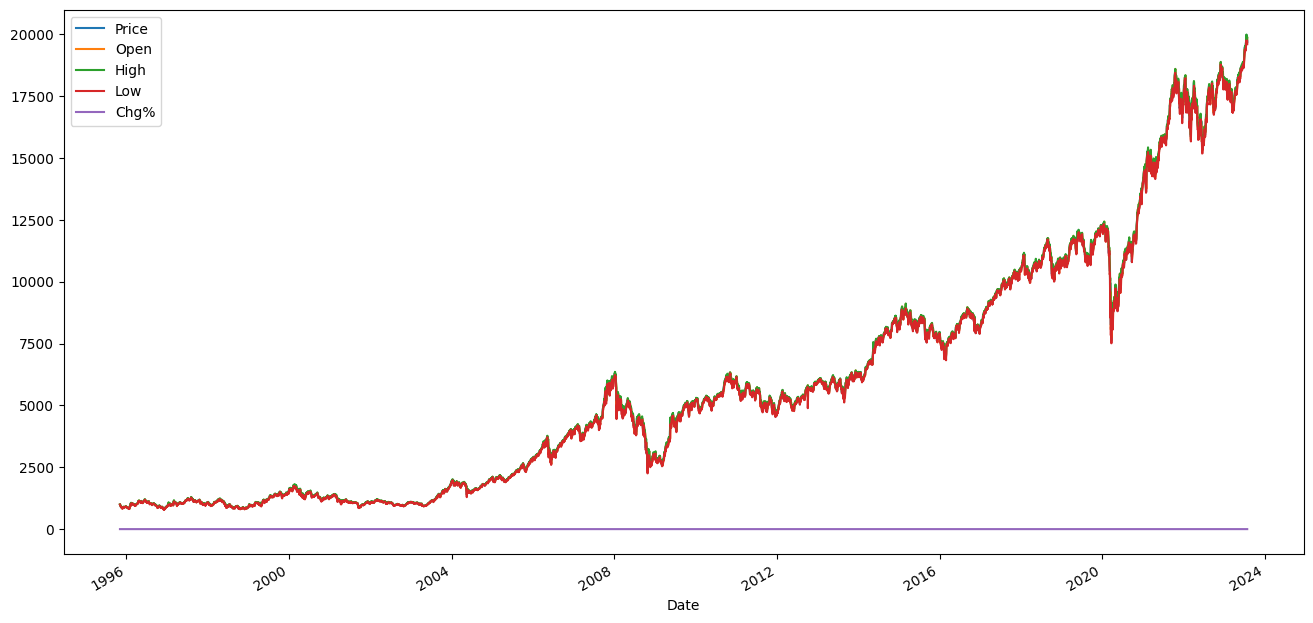

In [392]:
data.plot(x = 'Date', figsize = (16, 8))

<Axes: title={'center': 'Price of nifty 50 over the years'}, xlabel='Date', ylabel='Price'>

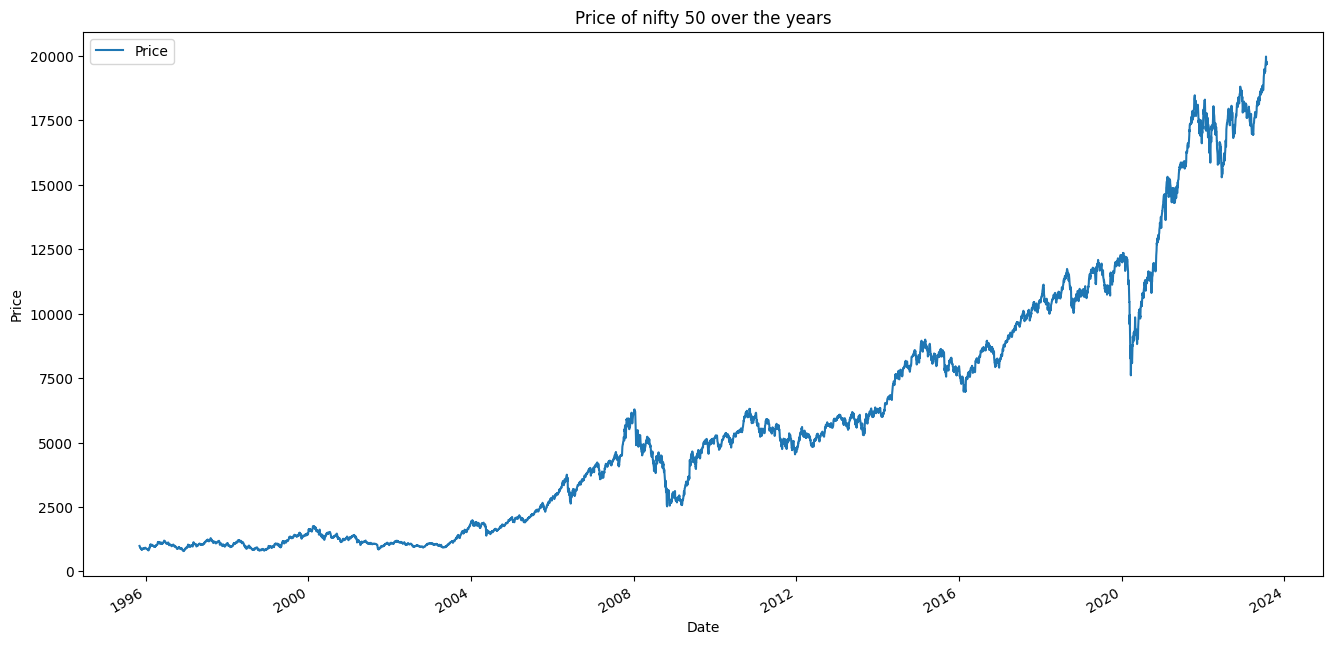

In [390]:
graph = data.plot(x = 'Date', y = 'Price', kind = 'line', title = 'Price of nifty 50 over the years', xlabel = 'Date', ylabel = 'Price', figsize = (16, 8))
graph

<Axes: title={'center': 'Change % in the stock price throughout the years'}, xlabel='Date', ylabel='Change %'>

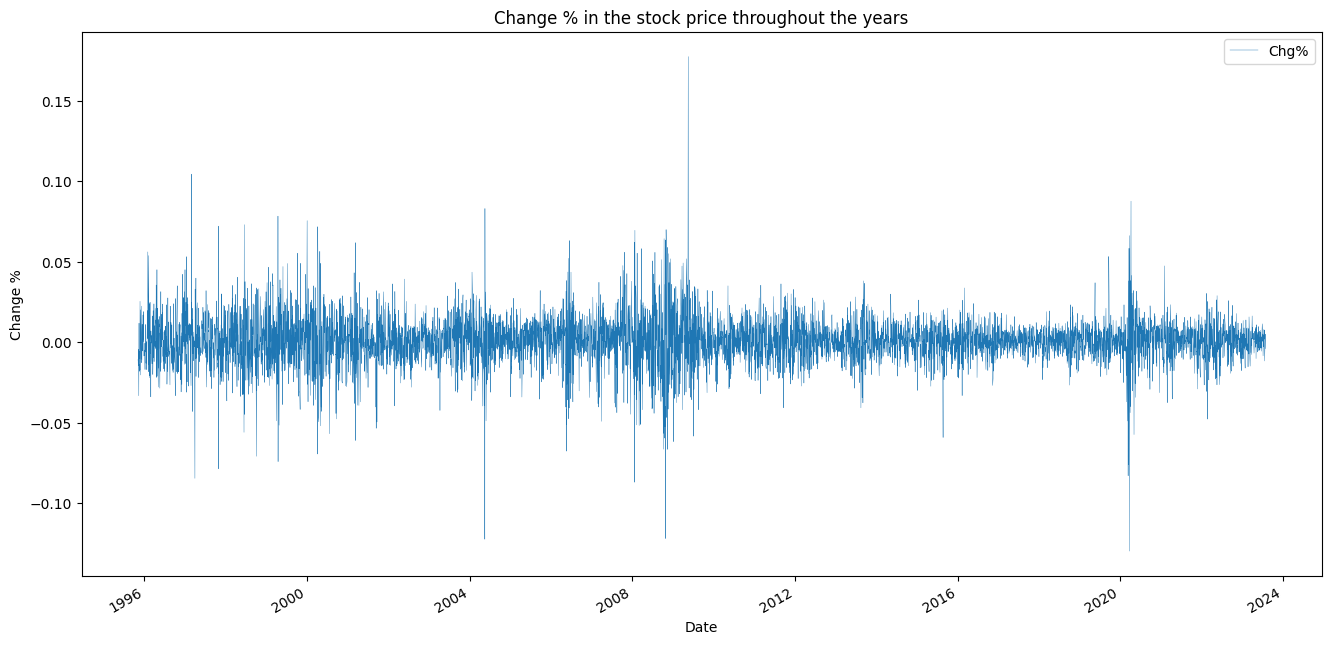

In [292]:
data.plot(x = 'Date', y = 'Chg%', kind = 'line', linewidth = 0.3, linestyle = '-', title = 'Change % in the stock price throughout the years', xlabel = 'Date', ylabel = 'Change %', figsize = (16 ,8))

# training and test data split

In [322]:
X = data[['Open', 'High', 'Low', 'Chg%']]
y = data['Price']

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

# trying different models

In [344]:
Linear_Regression = LinearRegression()

### fitting (assigning the training data to your model for it to train)

In [345]:
Linear_Regression.fit(X_train, y_train)

LinearRegression()

In [346]:
Linear_Regression_prediction = Linear_Regression.predict(X_test)

# Matrics

#### Mean Squared error (lower is better)

In [347]:
MSE_Linear_Regression = mean_squared_error(y_test, Linear_Regression_prediction)

In [348]:
MSE_Linear_Regression

631.2076316713351

#### R-squared score (closer to 1 is better)

In [349]:
R2_Linear_Regression = r2_score(y_test, Linear_Regression_prediction)

In [350]:
R2_Linear_Regression

0.9999729559131105

In [351]:
print(X_train.shape, ('X_train shape'))
print(y_train.shape, ('y_train shape'))

(5864, 4) X_train shape
(5864,) y_train shape


In [352]:
X_test.columns

Index(['Open', 'High', 'Low', 'Chg%'], dtype='object')

In [353]:
y_test

2091     8809.35
5506     1127.20
1293    10741.70
1093    10835.30
1630     8034.85
          ...   
5498     1112.75
3938     4464.00
5320     1178.00
1463     9917.90
912     12100.70
Name: Price, Length: 1035, dtype: float64

In [354]:
Linear_Regression_prediction.shape

(1035,)

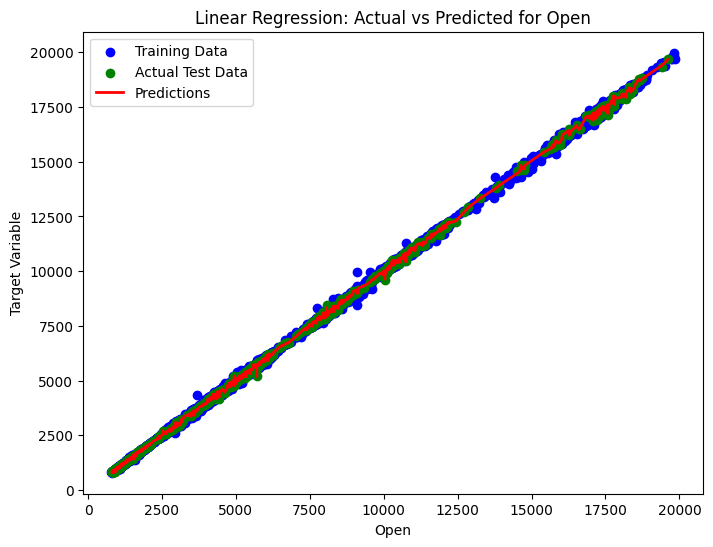

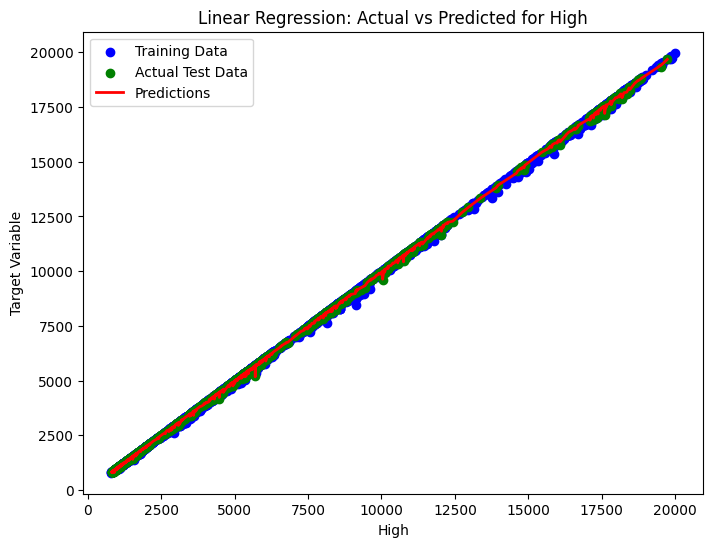

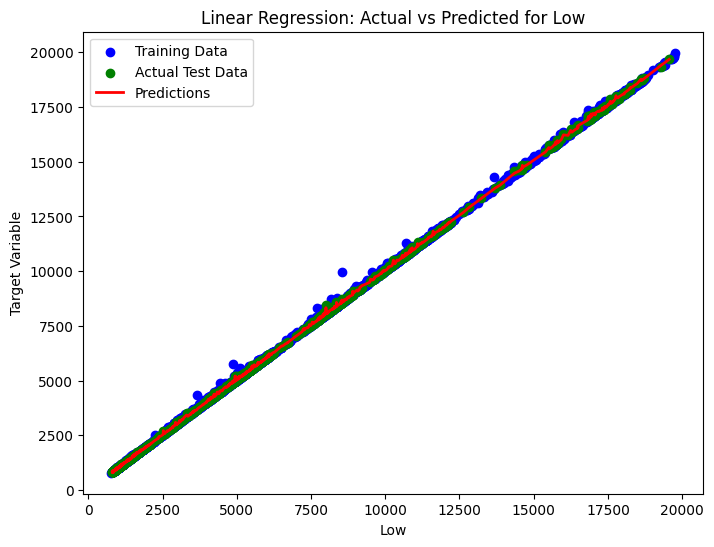

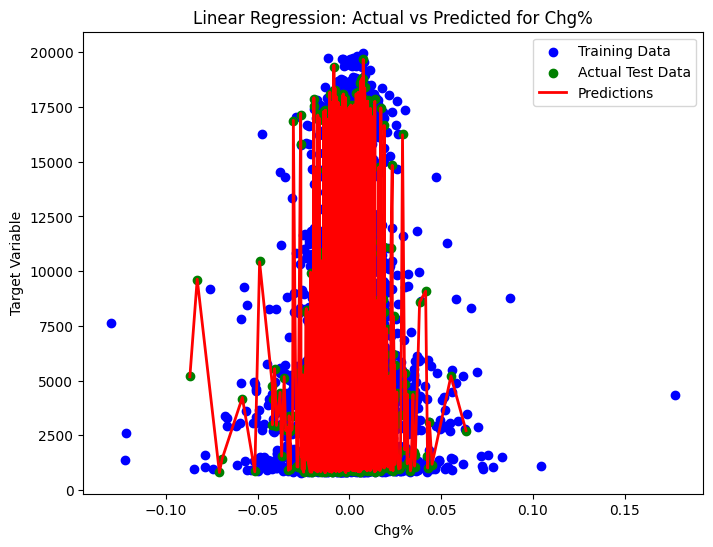

In [355]:
# Assuming X_test is a DataFrame with 4 columns
feature_names = ['Open', 'High', 'Low', 'Chg%']

# Plot each feature against the target variable
for i in range(X_test.shape[1]):
    plt.figure(figsize=(8, 6))

    # Scatter plot for training data
    plt.scatter(X_train.iloc[:, i], y_train, color='blue', label='Training Data')

    # Scatter plot for actual test data
    plt.scatter(X_test.iloc[:, i], y_test, color='green', label='Actual Test Data')

    # Sort the predicted values based on the feature for a smooth line plot
    sorted_indices = X_test.iloc[:, i].argsort()
    plt.plot(X_test.iloc[:, i].iloc[sorted_indices], Linear_Regression_prediction[sorted_indices], color='red', linewidth=2, label='Predictions')

    plt.title(f'Linear Regression: Actual vs Predicted for {feature_names[i]}')
    plt.xlabel(f'{feature_names[i]}')
    plt.ylabel('Target Variable')
    plt.legend()
    plt.show()


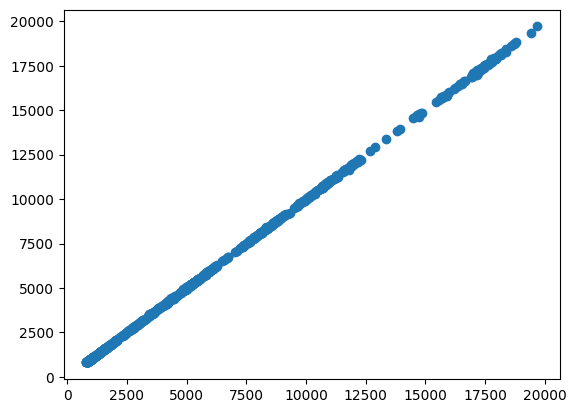

In [356]:
plt.scatter(Linear_Regression_prediction, y_test)

Text(0, 0.5, 'Predicted Values')

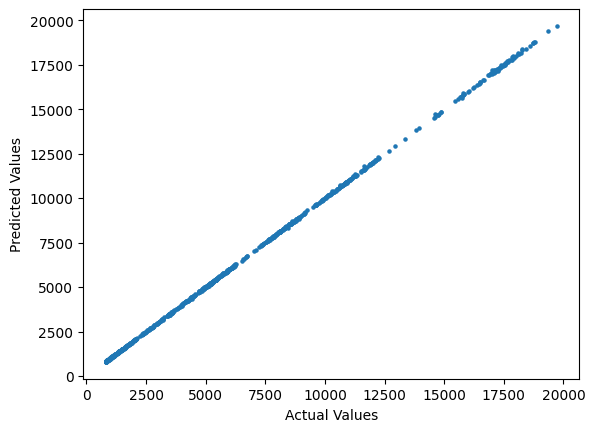

In [357]:
plt.scatter(y_test, Linear_Regression_prediction, s = 5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

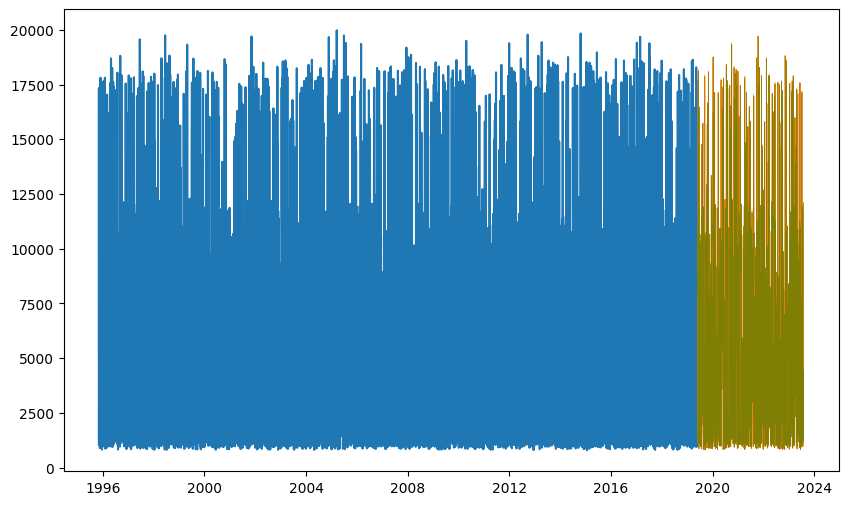

In [358]:
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][:len(y_train)], y_train, label='True Train Values', linestyle='-')
plt.plot(data['Date'][-len(y_test):], y_test, linestyle = '-', linewidth = 0.7)
plt.plot(data['Date'][-len(Linear_Regression_prediction):], Linear_Regression_prediction, label='Linear Regression Predictions', color = 'green', linestyle='-', linewidth = 0.3, alpha = 0.5)


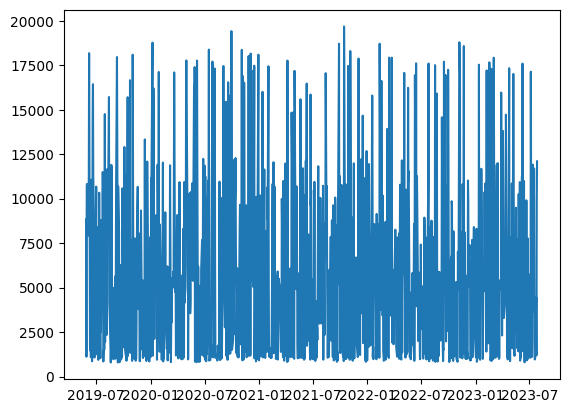

In [359]:
plt.plot(data['Date'][-len(Linear_Regression_prediction):], Linear_Regression_prediction)

In [360]:
Linear_Regression_prediction

array([ 8833.53650453,  1118.74825953, 10745.06284009, ...,
        1193.47785603,  9888.53263654, 12095.75246401])

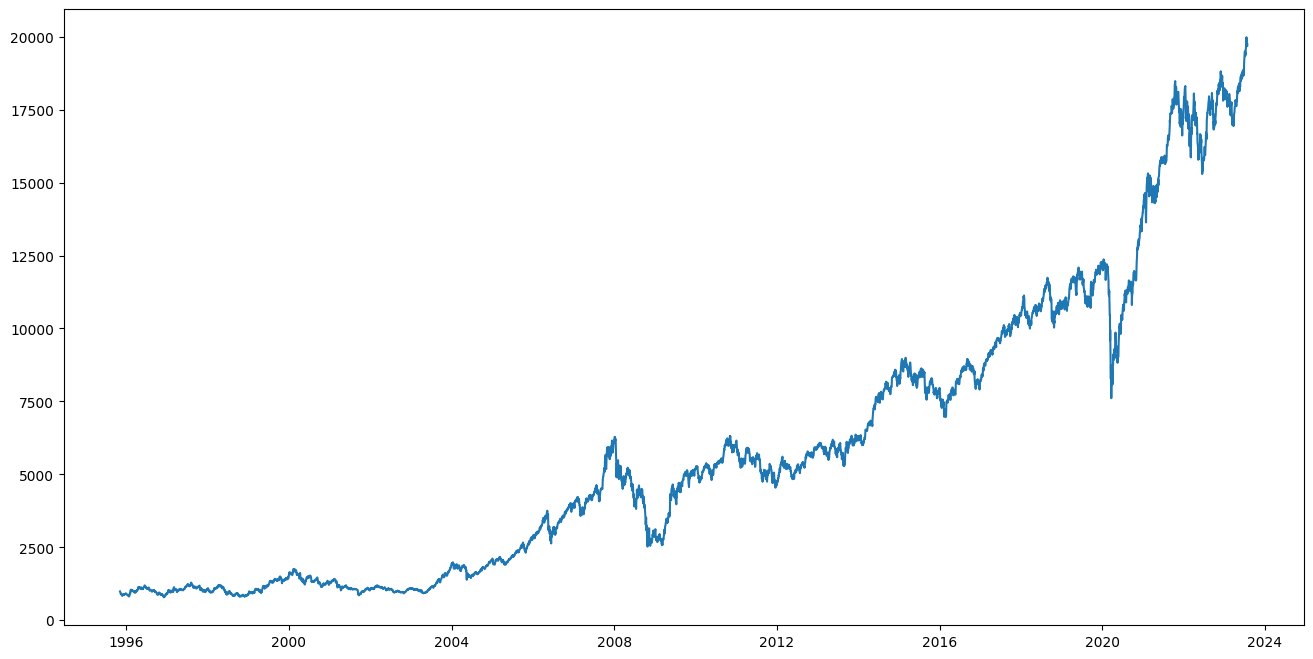

In [403]:
df = data.reset_index()['Price']
plt.figure(figsize = (16, 8))
plt.plot(data['Date'], df)

# test

In [340]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [341]:
df.shape

(6899, 1)

In [435]:
training_size = int(len(df)*0.70)
testing_size = len(df) - training_size

In [436]:
training_data = df[0:training_size:]

In [437]:
testing_data = df[training_size: len(df)]

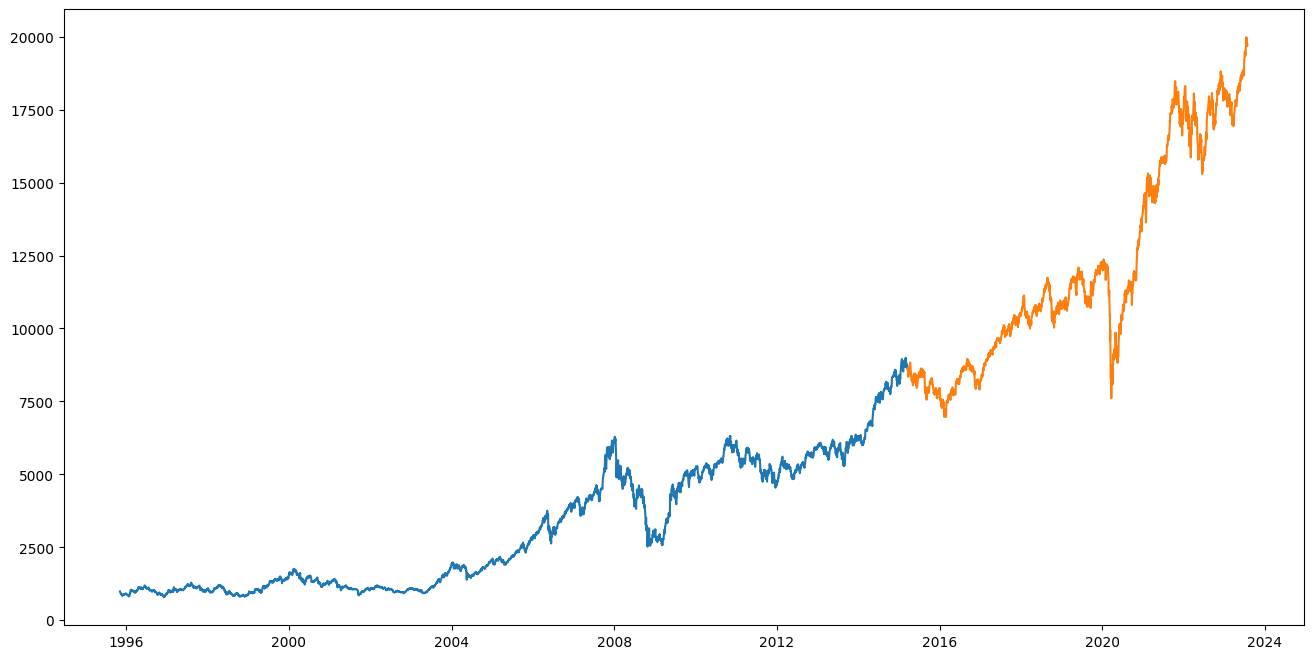

In [438]:
plt.figure(figsize = (16,8))
plt.plot(data['Date'][:len(training_data)], training_data)
plt.plot(data['Date'][-len(testing_data):], testing_data[:len(training_data)])

In [442]:
training_size, testing_size

(4829, 2070)

In [446]:
training_data, testing_data

(0        988.92
 1        978.22
 2        964.01
 3        953.07
 4        948.82
          ...   
 4824    8776.00
 4825    8647.75
 4826    8633.15
 4827    8723.30
 4828    8685.90
 Name: Price, Length: 4829, dtype: float64,
 4829     8634.65
 4830     8570.90
 4831     8550.90
 4832     8542.95
 4833     8530.80
           ...   
 6894    19745.00
 6895    19672.35
 6896    19680.60
 6897    19778.30
 6898    19699.00
 Name: Price, Length: 2070, dtype: float64)

In [455]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i: (i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [465]:
time_step = 100
X_training, y_training = create_dataset(training_data, time_step)
X_testing, y_testing = create_dataset(testing_data, time_step)

In [484]:
X_training = X_training.reshape(X_training.shape[0], X_training.shape[1], 1)
X_testing = X_testing.reshape(X_testing.shape[0], X_testing.shape[1], 1)

In [486]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [487]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [489]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [490]:
model.fit(X_training, y_training, validation_data = (X_testing, y_testing), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
74/74 [==============================] - 11s 102ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 2/100
74/74 [==============================] - 7s 95ms/step - loss: 7.0832e-05 - val_loss: 0.0021
Epoch 3/100
74/74 [==============================] - 7s 92ms/step - loss: 6.6431e-05 - val_loss: 0.0015
Epoch 4/100
74/74 [==============================] - 7s 94ms/step - loss: 6.3988e-05 - val_loss: 0.0014
Epoch 5/100
74/74 [==============================] - 7s 96ms/step - loss: 5.7117e-05 - val_loss: 0.0012
Epoch 6/100
74/74 [==============================] - 7s 96ms/step - loss: 5.7467e-05 - val_loss: 0.0014
Epoch 7/100
74/74 [==============================] - 7s 95ms/step - loss: 5.3640e-05 - val_loss: 7.0697e-04
Epoch 8/100
74/74 [==============================] - 7s 94ms/step - loss: 4.7673e-05 - val_loss: 5.8973e-04
Epoch 9/100
74/74 [==============================] - 7s 95ms/step - loss: 4.3695e-05 - val_loss: 4.8070e-04
Epoch 10/100
74/74 [==============================] - 

In [493]:
import tensorflow as tf

In [494]:
train_prediction = model.predict(X_training)
test_prediction = model.predict(X_testing)

62/62 [==============================] - 1s 18ms/step


In [500]:
train_prediction = scaler.inverse_transform(train_prediction)
test_prediction = scaler.inverse_transform(test_prediction)

In [501]:
import math
math.sqrt(mean_squared_error(y_training, training_prediction))

3775.9774251979984

In [502]:
math.sqrt(mean_squared_error(y_testing, testing_prediction))

12558.032195050939

In [518]:
df.shape

TypeError: 'tuple' object is not callable

In [507]:
look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_prediction) + look_back, :] = train_prediction

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_prediction) + (look_back*2) + 1:len(df) - 1, :] = test_prediction

plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

Epoch 1/100
74/74 [==============================] - 10s 98ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 2/100
74/74 [==============================] - 7s 88ms/step - loss: 6.8186e-05 - val_loss: 0.0016
Epoch 3/100
74/74 [==============================] - 7s 89ms/step - loss: 6.8761e-05 - val_loss: 0.0012
Epoch 4/100
74/74 [==============================] - 7s 93ms/step - loss: 5.9711e-05 - val_loss: 7.0651e-04
Epoch 5/100
74/74 [==============================] - 7s 88ms/step - loss: 6.0263e-05 - val_loss: 8.3948e-04
Epoch 6/100
74/74 [==============================] - 7s 90ms/step - loss: 5.2265e-05 - val_loss: 4.5961e-04
Epoch 7/100
74/74 [==============================] - 7s 89ms/step - loss: 5.0058e-05 - val_loss: 4.1195e-04
Epoch 8/100
74/74 [==============================] - 7s 92ms/step - loss: 4.3904e-05 - val_loss: 4.1285e-04
Epoch 9/100
74/74 [==============================] - 7s 90ms/step - loss: 4.5106e-05 - val_loss: 5.7237e-04
Epoch 10/100
74/74 [=======================

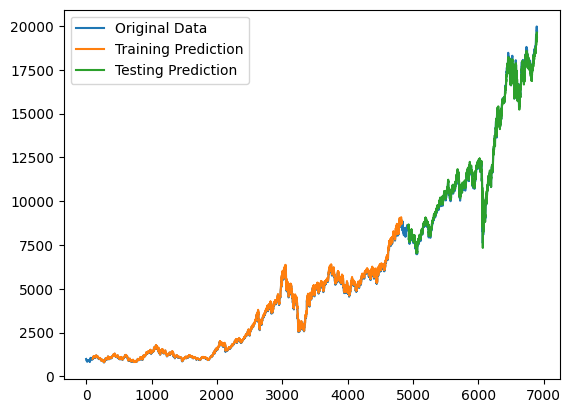

In [514]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import math

# Assuming df is your time series data

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(np.array(df).reshape(-1, 1))

training_size = int(len(df_scaled) * 0.70)
testing_size = len(df_scaled) - training_size

training_data = df_scaled[0:training_size, :]
testing_data = df_scaled[training_size:len(df_scaled), :]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_training, y_training = create_dataset(training_data, time_step)
X_testing, y_testing = create_dataset(testing_data, time_step)

X_training = X_training.reshape(X_training.shape[0], X_training.shape[1], 1)
X_testing = X_testing.reshape(X_testing.shape[0], X_testing.shape[1], 1)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_training, y_training, validation_data=(X_testing, y_testing), epochs=100, batch_size=64, verbose=1)

train_prediction = model.predict(X_training)
test_prediction = model.predict(X_testing)

train_prediction = scaler.inverse_transform(train_prediction)
test_prediction = scaler.inverse_transform(test_prediction)

train_mse = math.sqrt(mean_squared_error(y_training, train_prediction))
test_mse = math.sqrt(mean_squared_error(y_testing, test_prediction))

print(f"Train RMSE: {train_mse}")
print(f"Test RMSE: {test_mse}")

look_back = 100

trainPredictPlot = np.empty_like(df_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_prediction) + look_back, :] = train_prediction

testPredictPlot = np.empty_like(df_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_prediction) + (look_back * 2) + 1:len(df_scaled) - 1, :] = test_prediction

# Plot the original, training, and testing data
plt.plot(scaler.inverse_transform(df_scaled), label="Original Data")
plt.plot(trainPredictPlot, label="Training Prediction")
plt.plot(testPredictPlot, label="Testing Prediction")
plt.legend()
plt.show()


Epoch 1/10
74/74 [==============================] - 11s 101ms/step - loss: 0.0016 - val_loss: 8.7069e-04
Epoch 2/10
74/74 [==============================] - 7s 89ms/step - loss: 6.9291e-05 - val_loss: 0.0011
Epoch 3/10
74/74 [==============================] - 7s 89ms/step - loss: 6.4398e-05 - val_loss: 0.0011
Epoch 4/10
74/74 [==============================] - 7s 89ms/step - loss: 6.6166e-05 - val_loss: 0.0019
Epoch 5/10
74/74 [==============================] - 7s 89ms/step - loss: 6.2009e-05 - val_loss: 0.0014
Epoch 6/10
74/74 [==============================] - 6s 86ms/step - loss: 6.0802e-05 - val_loss: 8.2541e-04
Epoch 7/10
74/74 [==============================] - 6s 86ms/step - loss: 5.6631e-05 - val_loss: 8.4696e-04
Epoch 8/10
74/74 [==============================] - 7s 90ms/step - loss: 5.2560e-05 - val_loss: 7.5450e-04
Epoch 9/10
74/74 [==============================] - 7s 93ms/step - loss: 5.4030e-05 - val_loss: 6.1286e-04
Epoch 10/10
62/62 [==============================] - 1s

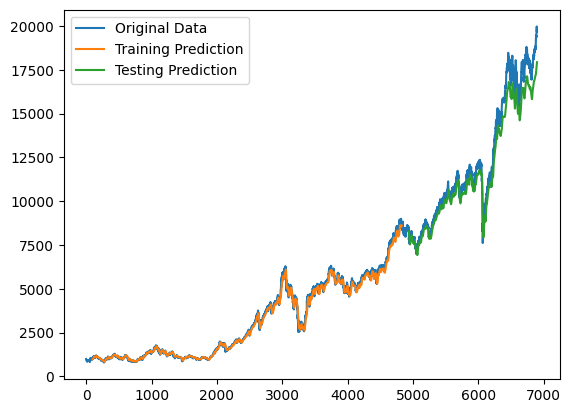

In [521]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import math

# Assuming df is your time series data

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(np.array(df).reshape(-1, 1))

training_size = int(len(df_scaled) * 0.70)
testing_size = len(df_scaled) - training_size

training_data = df_scaled[0:training_size, :]
testing_data = df_scaled[training_size:len(df_scaled), :]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_training, y_training = create_dataset(training_data, time_step)
X_testing, y_testing = create_dataset(testing_data, time_step)

X_training = X_training.reshape(X_training.shape[0], X_training.shape[1], 1)
X_testing = X_testing.reshape(X_testing.shape[0], X_testing.shape[1], 1)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_training, y_training, validation_data=(X_testing, y_testing), epochs=10, batch_size=64, verbose=1)

train_prediction = model.predict(X_training)
test_prediction = model.predict(X_testing)

train_prediction = scaler.inverse_transform(train_prediction)
test_prediction = scaler.inverse_transform(test_prediction)

train_mse = math.sqrt(mean_squared_error(y_training, train_prediction))
test_mse = math.sqrt(mean_squared_error(y_testing, test_prediction))

print(f"Train RMSE: {train_mse}")
print(f"Test RMSE: {test_mse}")

look_back = 100

trainPredictPlot = np.empty_like(df_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_prediction) + look_back, :] = train_prediction

testPredictPlot = np.empty_like(df_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_prediction) + (look_back * 2) + 1:len(df_scaled) - 1, :] = test_prediction

# Plot the original, training, and testing data
plt.plot(scaler.inverse_transform(df_scaled), label="Original Data")
plt.plot(trainPredictPlot, label="Training Prediction")
plt.plot(testPredictPlot, label="Testing Prediction")
plt.legend()
plt.show()
